<a id='0'></a>
# Data Exploration: Crimes
## The project includes:
<ul>
    <li> <a href='#1'> Ploting the crimes per days and district</a> </li>
    <li> <a href='#2'> Processing the crimes that include shootings </a> </li>
    <li> <a href='#3'> Hour-processing of crimes </a> </li>
    <li> <a href='#4'> Clustering mainly including the columns: Lat and Long</a> </li>
    <li> <a href='#5'> Create map to locate the incidents</a> </li>
</ul>

### Open the csv file and save the data
Saving the data in DataFrame for easy processing

In [332]:
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

np.set_printoptions(threshold=np.inf) # print entire arrays without truncation
%matplotlib inline

df = pd.read_csv('crime.csv', error_bad_lines=False, index_col=False, dtype='unicode', encoding = 'unicode_escape')
print("Processing done!")

Processing done!


<a id='1'></a>
### <a href='#0'> Plotting the analysis of the data </a>
Plots that describe the amount of crimes per year, per month and per day <br>

In [333]:
crimes_per_year = df.groupby(df['YEAR'].tolist(),as_index=False).size()
crimes_per_month = df.groupby(pd.to_numeric(df['MONTH']), as_index=False).size()
crimes_per_day = df.groupby(df['DAY_OF_WEEK'].tolist(),as_index=False).size()
print("Processing done!")

Processing done!


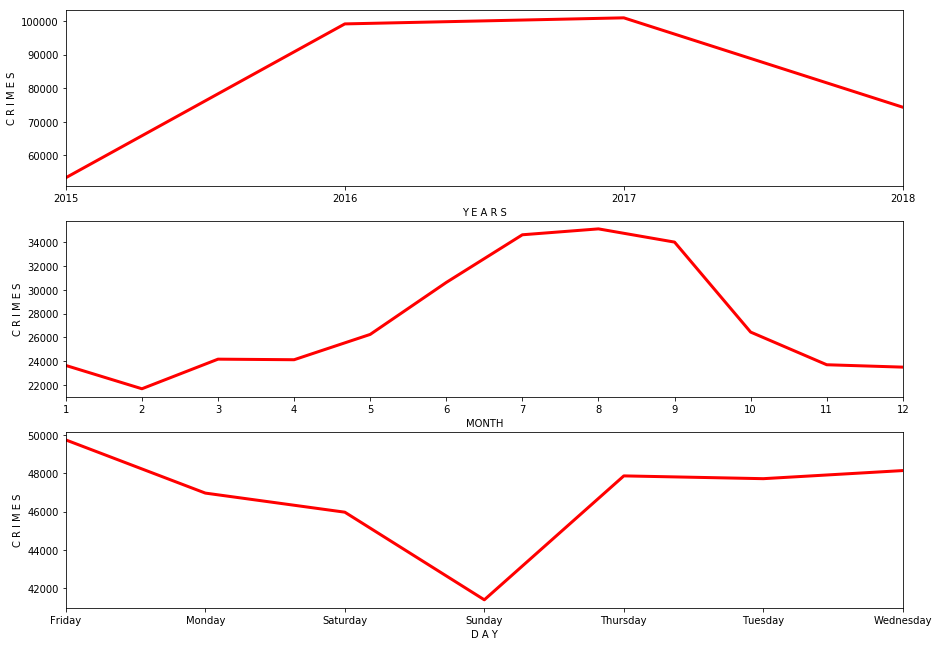

In [334]:
from numpy import arange
plt.figure(figsize=(15,11))
plt.subplot(3,1,1)
plt.xticks(arange(4, step=1))
plt.xlabel('Y E A R S') 
plt.ylabel('C R I M E S')
crimes_per_year.plot(color="red", linewidth=3)

plt.subplot(3,1,2)
plt.xticks(arange(13, step=1)) # to fix the x-axis(show all the numbers of months)
plt.xlabel('M O N T H S') 
plt.ylabel('C R I M E S') 
crimes_per_month.plot(color="red", linewidth=3)

plt.subplot(3,1,3)
plt.xlabel('D A Y') 
plt.ylabel('C R I M E S')
crimes_per_day.plot(color="red", linewidth=3)
plt.show()

Process the crimes by district, plot below with shootings per ditrict

In [303]:
df['DISTRICT'] = df['DISTRICT'].fillna('UNKNOWN') # Reaplace all the NaN values in column 'DISTRICT' with 'UNKNOWN'

crimes_per_district = df.groupby(df['DISTRICT'].tolist(),as_index=False).size()
print("Processing done!")

Processing done!


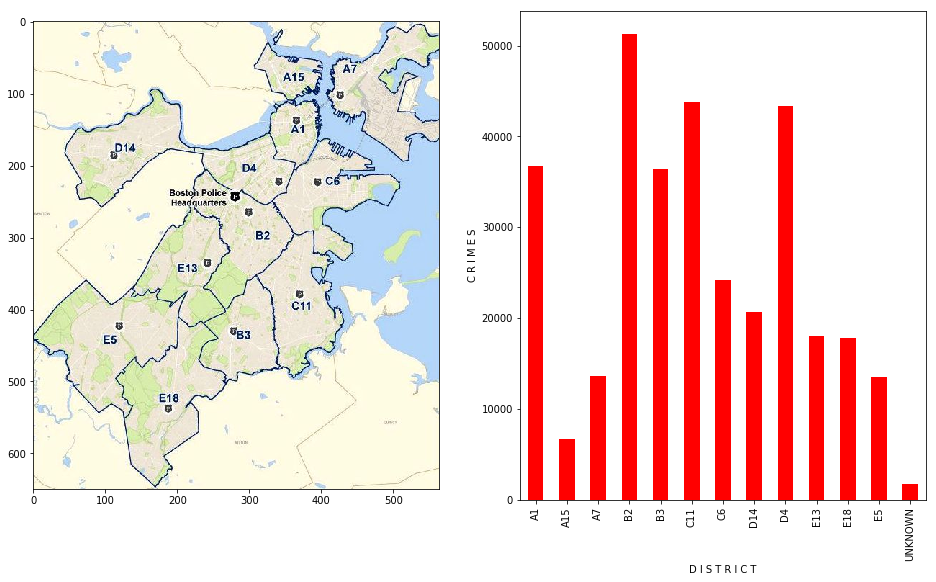

In [304]:
import matplotlib.image as mpimg
img=mpimg.imread('Police_Districts_Boston.png', 0)
plt.figure(1,figsize=(16,9))
plt.subplot(121)
plt.imshow(img)
# Plot the result
plt.subplot(122)
plt.xlabel('D I S T R I C T') 
plt.ylabel('C R I M E S')
plt.xticks(arange(13, step=1)) # to fix the x-axis(show all the numbers of regions-codes)
crimes_per_district.plot.bar(color="red")
plt.show()

<a id='2'></a>
### <a href='#0'> Crimes that include shootings (Gun violence) </a>

Year with the most shootings:

In [305]:
df['SHOOTING'] = df['SHOOTING'].fillna('N') # replace all the nan values in column 'SHOOTING' with 'N' (+++ added)
shootings_per_year = df.loc[df['SHOOTING'] == 'Y'].groupby(['YEAR']).size()
print("The most shootings --->", shootings_per_year.max(),"/",shootings_per_year.sum(),"(total number of shootings) fired in the year --->", shootings_per_year.idxmax())

The most shootings ---> 371 / 1055 (total number of shootings) fired in the year ---> 2017


Now plot the results and compare crimes_per_year with shootings_per_year

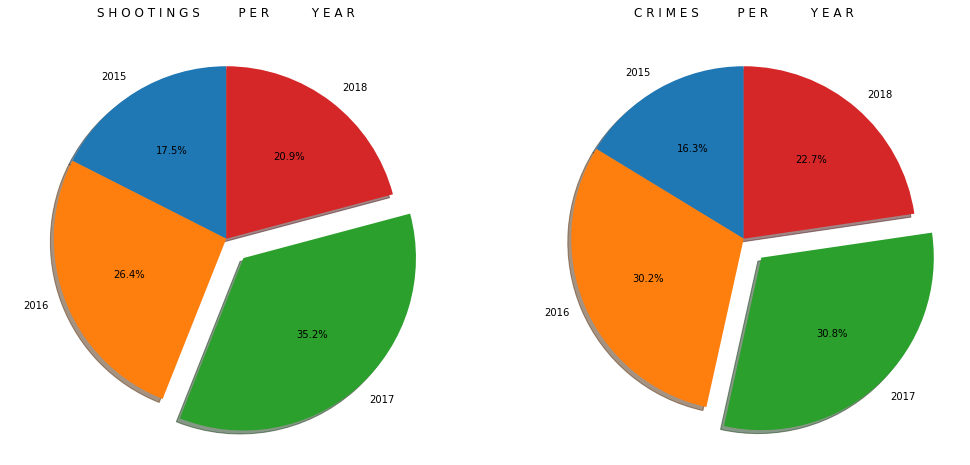

In [306]:
fig = plt.figure(figsize=(17,17))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.pie(shootings_per_year.values, explode=(0, 0, 0.15, 0), labels=shootings_per_year.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("S H O O T I N G S          P E R           Y E A R")
ax2.pie(crimes_per_year.values, explode=(0, 0, 0.15, 0), labels=crimes_per_year.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title("C R I M E S          P E R           Y E A R")
plt.show()

In [307]:
shootings_per_district = df.loc[df['SHOOTING'] == 'Y'].groupby(['DISTRICT']).size()
print("The most shootings --->", shootings_per_district.max(),"/",shootings_per_district.sum(),"(total number of shootings) fired in --->", shootings_per_district.idxmax())

The most shootings ---> 352 / 1055 (total number of shootings) fired in ---> B2


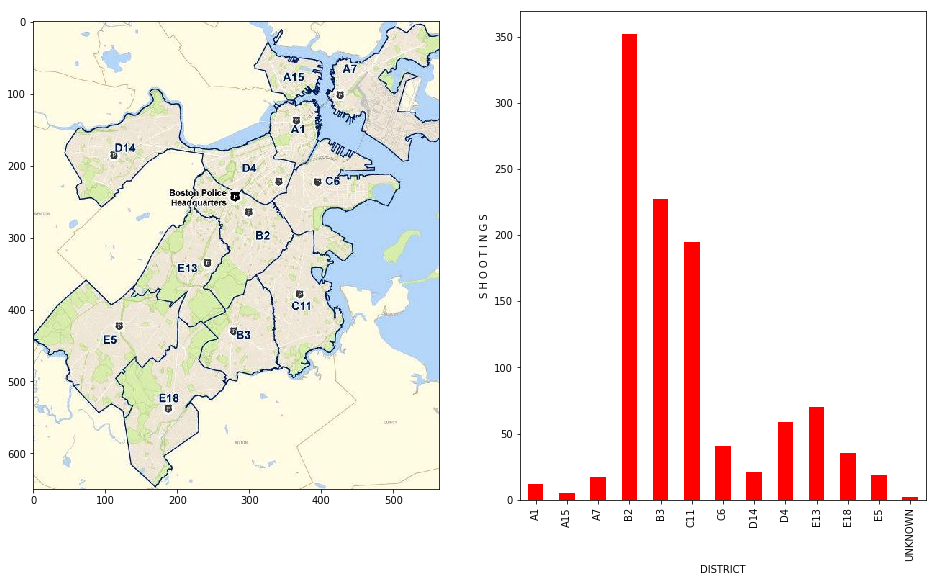

In [308]:
# Plot the result
img=mpimg.imread('Police_Districts_Boston.png', 0)
plt.figure(1,figsize=(16,9))
plt.subplot(121)
plt.imshow(img)
# Plot the result
plt.subplot(122)
plt.xlabel('D I S T R I C T') 
plt.ylabel('S H O O T I N G S')
plt.xticks(arange(13, step=1)) # to fix the x-axis(show all the numbers of regions-codes)
shootings_per_district.plot.bar(color="red")
plt.show()

<a id='3'></a>
### <a href='#0'> Hour-processing of crimes: day or night</a>
'D' is for day and 'N' is for night

In [309]:
hour = []
for i in df['HOUR']:
    if int(i)<18 and int(i)>6:
        hour.append("D")
    else:
        hour.append("N")
df['DAY_OR_NIGHT'] = hour
df.to_csv('crimes_new.csv')
print("A csv file 'crimes_new.csv' created with the extra DAY_OR_NIGHT column")

A csv file 'crimes_new.csv' created with the extra DAY_OR_NIGHT column


More crimes during the day or night?

In [310]:
df = pd.read_csv('./crimes_new.csv', error_bad_lines=False, index_col=False, dtype='unicode', encoding = 'unicode_escape')
crimes_per_hour = df.groupby(df['DAY_OR_NIGHT'].tolist(),as_index=False).size()
print("Processing done!")

Processing done!


In [12]:
print("More crimes happen at(D is for Day, N is for Night: [", crimes_per_hour.idxmax(), "], crimes: [", crimes_per_hour.max(), "]")
print("Analytically the crimes:")
print(crimes_per_hour)

More crimes happen at(D is for Day, N is for Night: [ D ], crimes: [ 184268 ]
Analytically the crimes:
D    184268
N    143552
dtype: int64


What type of crime is commited more often during the day?

The most crimes that are commited during the day [ 21852 ] and their type is [ Motor Vehicle Accident Response ]


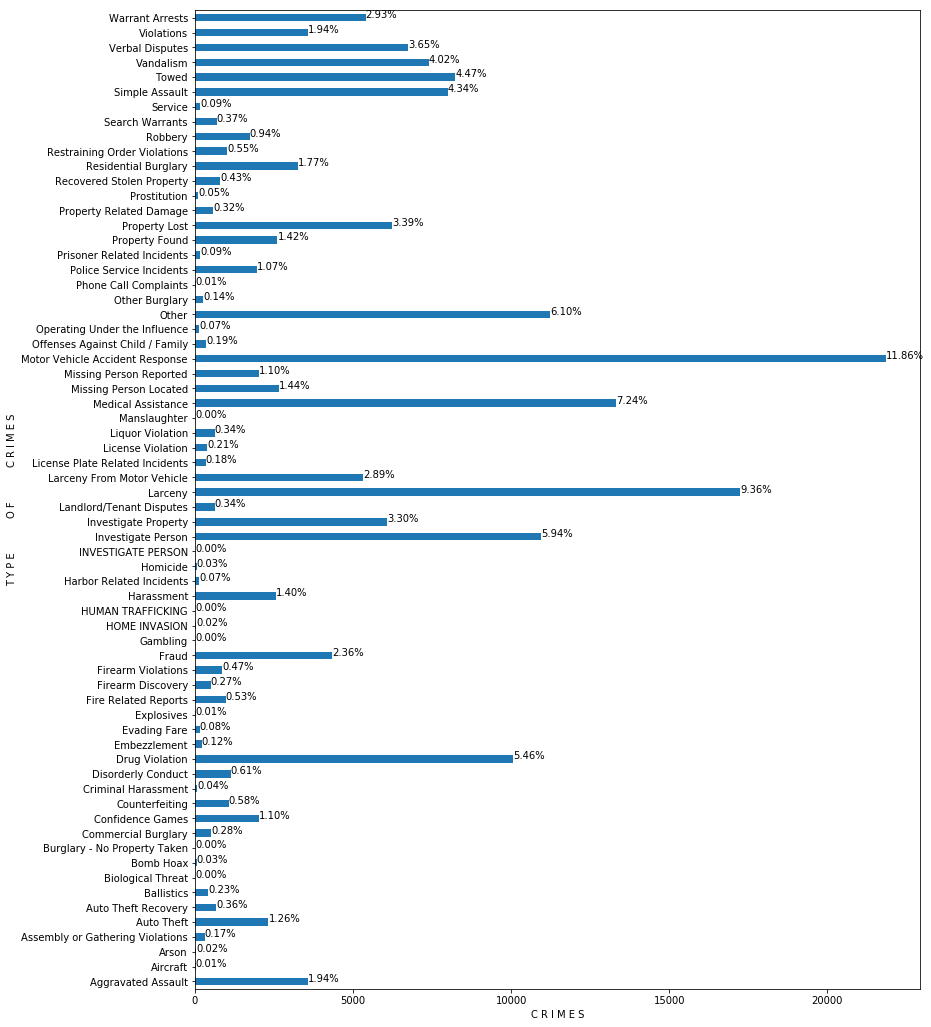

In [316]:
columns = pd.DataFrame(i[1:] for i in df['DAY_OR_NIGHT']+df['OFFENSE_CODE_GROUP'] if i[0] == 'D')
type_of_crime = columns.groupby(columns[0],as_index=False).size()
print("The most crimes that are commited during the day [", type_of_crime.max(),"] and their type is [" , type_of_crime.idxmax(),"]")
# Plot the result
plt.figure(figsize=(13,18))
ax = type_of_crime.plot.barh()
[ax.text(v, i, '{:.2f}%'.format(v*100/crimes_per_hour.max())) for i, v in enumerate(type_of_crime)]
plt.ylabel('T Y P E           O F           C R I M E S')
plt.xlabel('C R I M E S')
plt.show()

<a id='4'></a>
### <a href='#0'> Latitude and Longitude clustering</a>
Create a numpy array from columns: Lat and Long

In [317]:
location = df[['Lat', 'Long']]
location = location.dropna() # drop missing values
location = location.loc[((pd.to_numeric(location['Lat'],errors='coerce')) > 40 ) & ((pd.to_numeric(location['Long'],errors='coerce')) < -60)]
print("Processing done!")

Processing done!


Create a numpy array from columns: Lat, Long and OFFENSE_CODE

In [318]:
location_ofcode = df[['Lat', 'Long', 'OFFENSE_CODE']]
location_ofcode = location_ofcode.dropna() # drop missing values
location_ofcode = location_ofcode.loc[((pd.to_numeric(location_ofcode['Lat'],errors='coerce')) > 40 ) & ((pd.to_numeric(location_ofcode['Long'],errors='coerce')) < -60)]
print("Processing done!")

Processing done!


Create a numpy array from columns: Lat, Long and MONTH

In [319]:
location_month = df[['Lat', 'Long', 'MONTH']]
location_month = location_month.dropna() # drop missing values
location_month = location_month.loc[((pd.to_numeric(location_month['Lat'],errors='coerce')) > 40 ) & ((pd.to_numeric(location_month['Long'],errors='coerce')) < -60)]
print("Processing done!")

Processing done!


Clustering the data--> number of clusters 2,3,5,10 to 3 categories:
<ul>
    <li> Lat and Long </li>
    <li> Lat, Long and OFFENSE_CODE </li>
    <li> Lat, Long and MONTH </li>
</ul>

In [337]:
from sklearn.cluster import KMeans

# Included only Lat and Long columns
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(location)
centroids_2 = kmeans_2.cluster_centers_
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(location)
centroids_3 = kmeans_3.cluster_centers_
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(location)
centroids_5 = kmeans_5.cluster_centers_
kmeans_10 = KMeans(n_clusters=10, random_state=0).fit(location)
centroids_10 = kmeans_10.cluster_centers_
print("Processing done!")

Processing done!


In [321]:
# Included Locations and Offence code culumns
kmeans_2o = KMeans(n_clusters=2, random_state=0).fit(location_ofcode)
centroids_2o = kmeans_2o.cluster_centers_
kmeans_3o = KMeans(n_clusters=3, random_state=0).fit(location_ofcode)
centroids_3o = kmeans_3o.cluster_centers_
kmeans_5o = KMeans(n_clusters=5, random_state=0).fit(location_ofcode)
centroids_5o = kmeans_5o.cluster_centers_
kmeans_10o = KMeans(n_clusters=10, random_state=0).fit(location_ofcode)
centroids_10o = kmeans_10o.cluster_centers_
print("Processing done!")

Processing done!


In [322]:
# Including Locations and Month columns
kmeans_2m = KMeans(n_clusters=2, random_state=0).fit(location_month)
centroids_2m = kmeans_2m.cluster_centers_
kmeans_3m = KMeans(n_clusters=3, random_state=0).fit(location_month)
centroids_3m = kmeans_3m.cluster_centers_
kmeans_5m = KMeans(n_clusters=5, random_state=0).fit(location_month)
centroids_5m = kmeans_5m.cluster_centers_
kmeans_10m = KMeans(n_clusters=10, random_state=0).fit(location_month)
centroids_10m = kmeans_10m.cluster_centers_
print("Processing done!")

Processing done!


Plot the cluster's centers (with 5 and 20 clusters) from the 3 categories

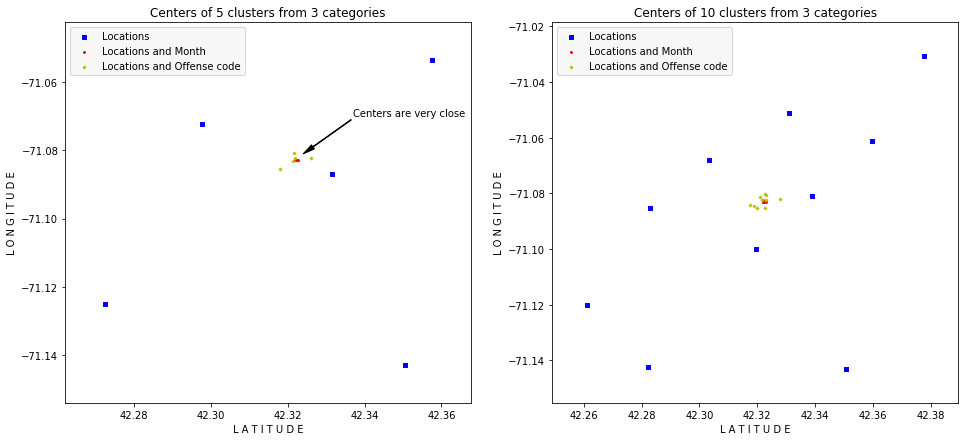

In [323]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(121)
plt.title("Centers of 5 clusters from 3 categories")
plt.xlabel("L A T I T U D E")
plt.ylabel("L O N G I T U D E")
ax1.scatter(centroids_5[:, 0], centroids_5[:, 1], s=20, c='b', marker="s", label='Locations')
ax1.scatter(centroids_5m[:, 0], centroids_5m[:, 1], s=4, c='r', marker="8", label='Locations and Month')
ax1.scatter(centroids_5o[:, 0], centroids_5o[:, 1], s=4, c='y', marker="D", label='Locations and Offense code')
plt.annotate('Centers are very close', xy=(42.324, -71.081), xytext=(42.337, -71.07),
             arrowprops=dict(facecolor='black', shrink=1, width=0.5, headwidth=5),)
plt.legend(loc='upper left', facecolor='whitesmoke')

ax2 = fig.add_subplot(122)
plt.title("Centers of 10 clusters from 3 categories")
plt.xlabel("L A T I T U D E")
plt.ylabel("L O N G I T U D E")
ax2.scatter(centroids_10[:, 0], centroids_10[:, 1], s=20, c='b', marker="s", label='Locations')
ax2.scatter(centroids_10m[:, 0], centroids_10m[:, 1], s=4, c='r', marker="8", label='Locations and Month')
ax2.scatter(centroids_10o[:, 0], centroids_10o[:, 1], s=4, c='y', marker="D", label='Locations and Offense code')
plt.legend(loc='upper left', facecolor='whitesmoke')
plt.show()

We see that cluster's centers from the categories that include extra characteristics(here month and offense code) are very close as a result clustering will be not accurate.

Plot clusters(here the first 5000 elements because with all it will be slow) for all categories (with the 5 clusters centers):

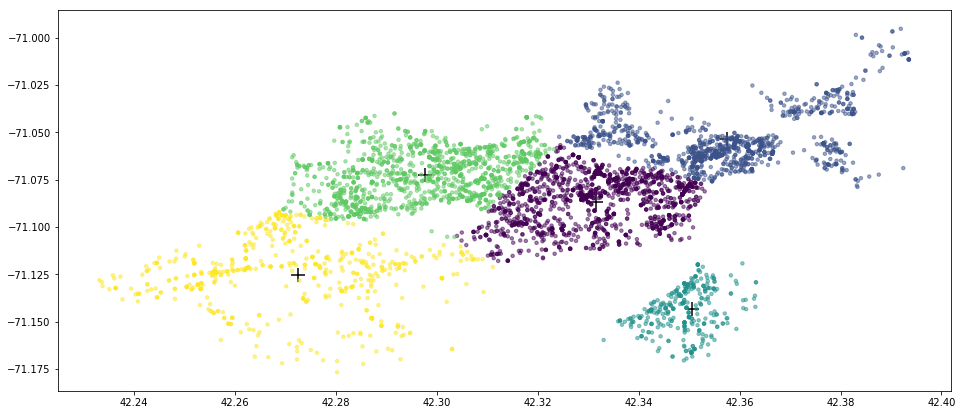

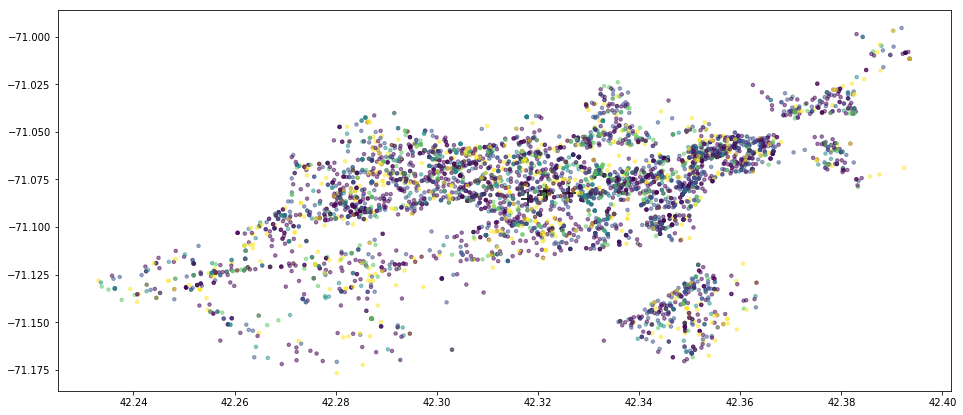

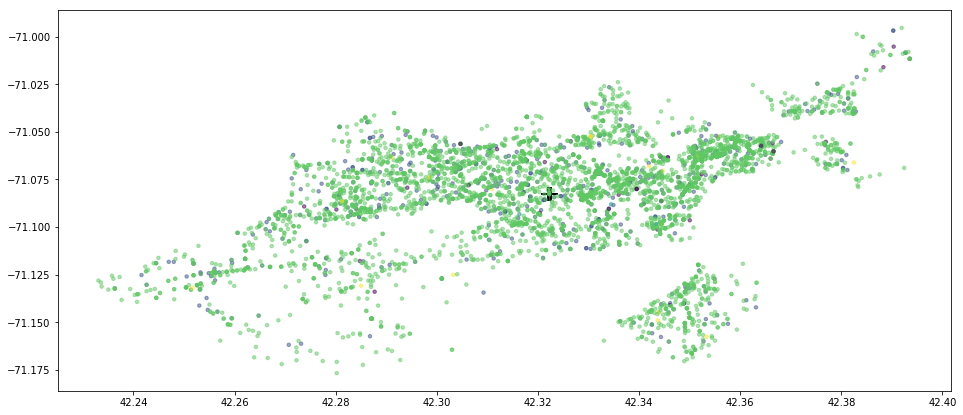

In [331]:
plt.figure(figsize=(16,7))
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], marker='+', color='black', s=200);
plt.scatter(location['Lat'][:5000].astype(float), location['Long'][:5000].astype(float), c=kmeans_5.labels_[:5000].astype(float), s=12, alpha=0.5)
plt.show()

plt.figure(figsize=(16,7))
plt.scatter(centroids_5o[:, 0], centroids_5o[:, 1], marker='+', color='black', s=200);
plt.scatter(location_ofcode['Lat'][:5000].astype(float), location_ofcode['Long'][:5000].astype(float), c=kmeans_5o.labels_[:5000].astype(float), s=12, alpha=0.5)
plt.show()

plt.figure(figsize=(16,7))
plt.scatter(centroids_5m[:, 0], centroids_5m[:, 1], marker='+', color='black', s=200);
plt.scatter(location_month['Lat'][:5000].astype(float), location_month['Long'][:5000].astype(float), c=kmeans_5m.labels_[:5000].astype(float), s=12, alpha=0.5)
plt.show()

# For all points uncomment the follow lines:

#plt.figure(figsize=(16,7))
#plt.scatter(centroids_5[:, 0], centroids_5[:, 1], marker='+', color='black', s=200);
#plt.scatter(location['Lat'].astype(float), location['Long'].astype(float), c=kmeans_5.labels_.astype(float), s=12, alpha=0.5)
#plt.show()
#plt.figure(figsize=(16,7))
#plt.scatter(centroids_5o[:, 0], centroids_5o[:, 1], marker='+', color='black', s=200);
#plt.scatter(location_ofcode['Lat'].astype(float), location_ofcode['Long'].astype(float), c=kmeans_5o.labels_.astype(float), s=12, alpha=0.5)
#plt.show()
#plt.figure(figsize=(16,7))
#plt.scatter(centroids_5m[:, 0], centroids_5m[:, 1], marker='+', color='black', s=200);
#plt.scatter(location_month['Lat'].astype(float), location_month['Long'].astype(float), c=kmeans_5m.labels_.astype(float), s=12, alpha=0.5)
#plt.show()

<a id='5'></a>
### <a href='#0'> Create maps for "Drug Violation" and "Missing Person Reported" </a>
Prepare the data:

In [325]:
locs_map = df[['Lat', 'Long', 'OFFENSE_CODE_GROUP']]
locs_map = locs_map.dropna() # drop missing values

# Drug Violation
locs_drug_crime = locs_map.loc[locs_map['OFFENSE_CODE_GROUP'] == 'Drug Violation']
locs_drug_crime = pd.concat([pd.to_numeric(locs_drug_crime['Lat']), pd.to_numeric(locs_drug_crime['Long'])], axis=1)
# Missing Person Reported
locs_personmis_crime = locs_map.loc[locs_map['OFFENSE_CODE_GROUP'] == 'Missing Person Reported']
locs_locs_personmis_crime = pd.concat([pd.to_numeric(locs_personmis_crime['Lat']), pd.to_numeric(locs_personmis_crime['Long'])], axis=1)

First run the command --> <b>pip install folium</b><br>
Pass to maps the original Boston's coordinates 

In [326]:
import folium
from folium.plugins import MarkerCluster

Boston_lat = 42.359608
Boston_long = -71.058111
# map1: Drug Violation
crime_map1 = folium.Map(location=[Boston_lat , Boston_long] , zoom_start=12)
# map2: Missing Person Reported
crime_map2 = folium.Map(location=[Boston_lat , Boston_long] , zoom_start=12)

1) Map about drug violation:

In [329]:
mc = MarkerCluster()
for i in locs_drug_crime[:5000].itertuples():
    mc.add_child(folium.Marker(location=[i.Lat, i.Long]))
crime_map1.add_child(mc)
crime_map1.save("Drug_Violation_in_Boston.html")
print("Map created with name: Drug_Violation_in_Boston.html")

Map created with name: Drug_Violation_in_Boston.html


2) Map about missing person(reported)

In [330]:
mc = MarkerCluster()
for i in locs_personmis_crime.itertuples():
    mc.add_child(folium.Marker(location=[i.Lat, i.Long]))
crime_map2.add_child(mc)
crime_map2.save("Missing_Person_Reported_in_Boston.html")
print("Map created with name: Missing_Person_Reported_in_Boston.html")

Map created with name: Missing_Person_Reported_in_Boston.html
